In [10]:
from qcodes_contrib_drivers.drivers.Thorlabs.APT import Thorlabs_APT
import numpy as np
import matplotlib.pyplot as plt
from seabreeze.spectrometers import list_devices, Spectrometer
import time
import csv
import os

In [11]:
devices = list_devices()
if devices:
    print("Available devices:", devices)
else:
    print("No devices available.")

Available devices: [<SeaBreezeDevice HR4000:HR4C222>]


In [12]:
spec = Spectrometer(devices[0])

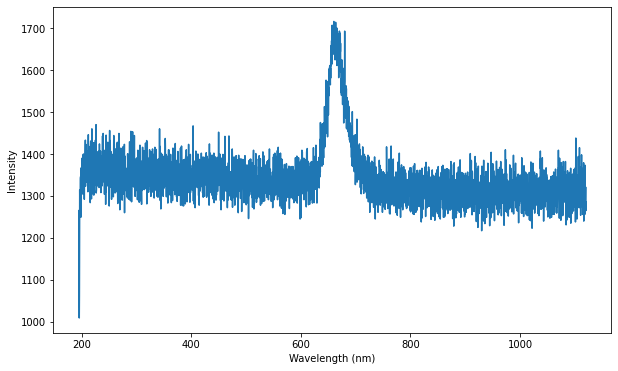

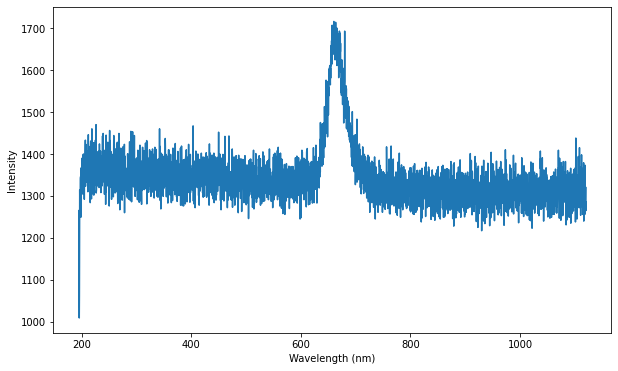

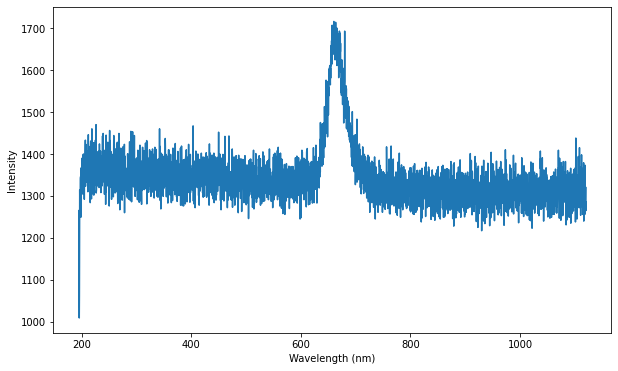

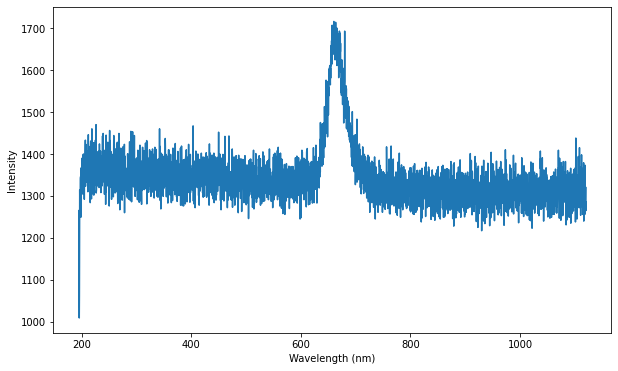

In [28]:
def perform_accumulation(spec, num_accumulations, exposure_time_micros):
        if spec is None:
            print("Spectrometer not connected. Please connect first.")
            return
        
        time.sleep(2.0)
        # Set integration time
        spec.integration_time_micros(exposure_time_micros)

        # Initialize lists to store wavelengths and intensities
        wavelengths = []
        intensities = []
    
        # Perform accumulation
        for i in range(num_accumulations):
            time.sleep(0.5)
            current_wavelengths = spec.wavelengths()
            current_intensities = spec.intensities()

            wavelengths.extend(current_wavelengths)
            intensities[i] = current_intensities

            fig = plt.figure(figsize=(10, 6))
            ax = fig.add_subplot(111)
            ax.plot(wavelengths[:len(current_wavelengths)], intensities[0])

            # Label the x and y axes
            ax.set_xlabel('Wavelength (nm)')
            ax.set_ylabel('Intensity')

            # Add angle and exposure time information inside the plot
            # info_text = f"Angle: {MeasurementController.current_angle}°\nExp Time: {exposure_time_micros} µs"
            # ax.text(0.98, 0.98, info_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))

            # plt.savefig(output_plot_filepath, bbox_inches='tight', pad_inches=0.5)
            # time.sleep(1.0)
            plt.show()
perform_accumulation(spec, 4, 200000)

In [14]:
spec.close()


In [9]:
spec.integration_time_micros(200000)
# wavelengths, intensities = spec.spectrum()

# print(wavelengths)
# print(intensities)
# spec = Spectrometer.from_first_available()

wavelengths, intensities = spec.spectrum()


# Plot the data
plt.plot(wavelengths, intensities)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()


SeaBreezeError: Error: No device found

In [30]:
wavelengths, intensities = spec.spectrum()

print(wavelengths)
print(intensities)

[ 194.9648667   195.23630391  195.50773147 ... 1120.06999776 1120.30609537
 1120.54218324]
[1292.  986. 1070. ... 1287. 1281. 1286.]


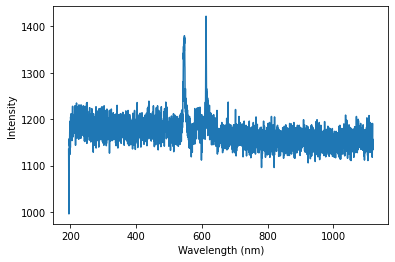

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Initialize the spectrometer (uncomment and replace with your spectrometer initialization)
# spec = Spectrometer.from_first_available()
# spec.integration_time_micros(200000)

# Create a plot window
plt.ion()  # Turn on interactive mode

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot([], [])  # Empty line for the plot

# Set the labels for the plot
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')

# Function to update the plot with new data
def update_plot(wavelengths, intensities):
    line.set_xdata(wavelengths)
    line.set_ydata(intensities)
    ax.relim()  # Update the limits of the axes
    ax.autoscale_view()  # Auto-scale the axes
    fig.canvas.draw()  # Redraw the plot
    display(fig)  # Display the updated plot
    clear_output(wait=True)  # Clear the previous output to avoid clutter

# Main loop to continuously update the plot with live spectrum data
try:
    while True:
        wavelengths, intensities = spec.spectrum()  # Replace with your spectrometer data acquisition
        update_plot(wavelengths, intensities)
except KeyboardInterrupt:  # Handle KeyboardInterrupt to gracefully exit the loop
    pass
